In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import seaborn as sns 
from sklearn.impute import MissingIndicator
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing  import OneHotEncoder
from sklearn.preprocessing  import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.feature_extraction.text import CountVectorizer

## Missing Data 

In [ ]:
df.drop()

In [2]:
mi = MissingIndicator()

In [3]:
df = sns.load_dataset('titanic')

In [4]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


- DEDACTION


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## Pandas Missing Data 

In [6]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## Sklearn Missing Data 

In [7]:
mi.fit(df)

MissingIndicator(error_on_new=True, features='missing-only', missing_values=nan,
                 sparse='auto')

In [8]:
mi.transform(df).sum()

869

In [9]:
mi.fit_transform(df[['survived']]).sum()

0

## Handiling The Missing Data With Pandas 

- Dropping

In [10]:
df_clean = df.copy()

In [11]:
 c

In [12]:
df_clean['embark_town'].isna().sum()

0

- Imputation Pandas

In [13]:
round(df['age'].mean())

30

In [14]:
df['age'].fillna(value = round(df['age'].mean()) , inplace = True )

In [15]:
df[df['age'].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone


In [16]:
df['age'].fillna(method = 'bfill' , inplace = True )

In [17]:
df['age'].fillna(method = 'ffill' , inplace = True )

- Imputation Sklearn 

In [19]:
## from sklearn.impute import SimpleImputer 

In [20]:
si = SimpleImputer(strategy='mean')

In [21]:
si.fit_transform(df[['age']])

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [30.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [30.  ],
       [31.  ],
       [30.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [30.  ],
       [19.  ],
       [30.  ],
       [30.  ],
       [40.  ],
       [30.  ],
       [30.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [30.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [30.  ],
       [ 3.  ],
       [19.  ],
       [30.  ],
       [30.  ],
       [30.  ],
       [30.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [30.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

## Duplication With Pandas 

In [22]:
df_dupl = df_clean[df_clean.duplicated()]

In [23]:
df_clean.drop_duplicates(inplace = True)

In [24]:
df_dupl

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
47,1,3,female,NaN,0,0,7.7500,Q,Third,woman,False,NaN,Queenstown,yes,True
76,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
77,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
87,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
878,0,3,male,NaN,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True


# Handeling Outliers With pandas 

- How to detactet the Outliers

In [25]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,782.0,0.410486,0.492237,0.00,0.00,0.000,1.000,1.0000
pclass,782.0,2.246803,0.853828,1.00,1.00,3.000,3.000,3.0000
age,676.0,29.809793,14.725652,0.42,20.00,28.000,39.000,80.0000
sibsp,782.0,0.524297,0.987138,0.00,0.00,0.000,1.000,8.0000
parch,782.0,0.416880,0.837728,0.00,0.00,0.000,1.000,6.0000
fare,782.0,34.595913,52.176458,0.00,8.05,15.875,33.375,512.3292


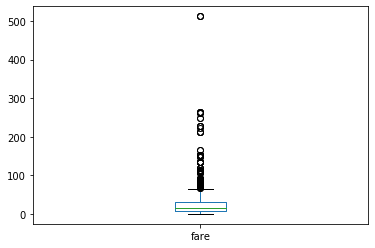

In [26]:
df['fare'].plot(kind = 'box')

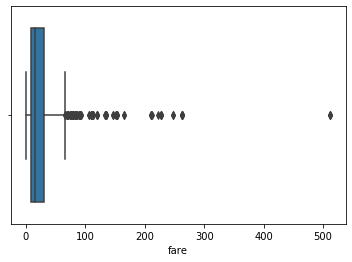

In [27]:
sns.boxplot(df['fare'])

- Handling Outliers 

In [28]:
q1 = df['fare'].quantile(0.25)
q3 = df['fare'].quantile(0.75)

In [29]:
iqr =  q3 - q1 

In [30]:
lower =  q1 - 1.5 * iqr
upper = q3 + 1.5 *iqr

In [31]:
lower

-26.724

In [32]:
upper

65.6344

In [33]:
df [ (df['fare'] <=  upper) & (df['fare'] >= lower ) ]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,30.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## Encoding 

### OneHot-Encoding Using Pandas  

In [34]:
pd.get_dummies(df['sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [35]:
pd.get_dummies(df['sex'] , drop_first=True )

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


## OneHot-Encoding Using Sklearn

In [36]:
## from sklearn.preprocessing  import OneHotEncoder

In [37]:
oh = OneHotEncoder()

In [38]:
oh.fit_transform(df_clean[['sex']]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

## Label Encoding in Sklearn 

In [39]:
## from sklearn.preprocessing  import LabelEncoder

In [40]:
lb = LabelEncoder()

In [41]:
df['New_Class'] =lb.fit_transform(df['class'])

In [42]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,New_Class
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0
888,0,3,female,30.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,2
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0


## Scaling 

## scaling with Sklearn MinMaxScaler

In [43]:
df['fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

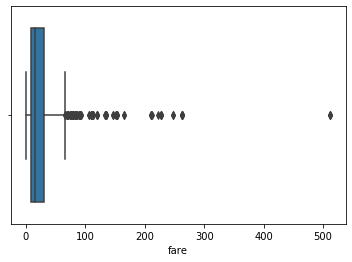

In [44]:
sns.boxplot(df['fare'])

In [45]:
## from sklearn.preprocessing import MinMaxScaler 

In [46]:
mi = MinMaxScaler()

In [47]:
df['fare'] = mi.fit_transform(df[['fare']])

### Scaling with StandardScaler

In [48]:
## from sklearn.preprocessing import StandardScaler

In [49]:
ss = StandardScaler()

In [53]:
df['fare_std'] = ss.fit_transform(df[['fare']])

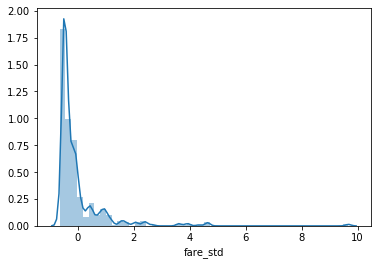

In [54]:
sns.distplot(df['fare_std'])

### Scaling with RobustScaler 

In [55]:
## from sklearn.preprocessing import RobustScaler

In [56]:
rb =  RobustScaler()

In [58]:
df['fare_rb'] =rb.fit_transform(df[['fare']])

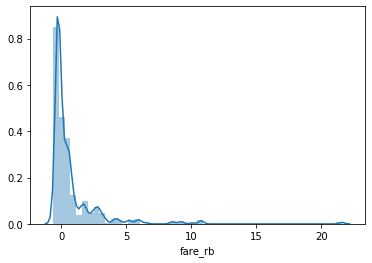

In [59]:
sns.distplot(df['fare_rb'])

## Handling The String Columns 

- spliting 

In [62]:
data = {'Name': ['Mustafa, Ahmed S.', 'Othman, mustafa M.', 'Mazen, Mariam ', 'Burhan, Saddik', 'Abdullah, Omnia N.', 'Jalil, Mustafa'],
       'Age': [26, 34, 18, 36, 28, 38],
       'Country': ['UAE', 'EGY', 'EGY', 'ERI', 'KSA', 'MAR'],
       'M/F': ['M','M','F','M','F', 'M'],
       'Email': ['a.mustafa@teqanny.com', 'm.othman@raqameyyah.com', 'm.mazen@teqanny.com','s.burhan@teqanny.com','o.nasser@teqanny.com','m.jalil@teqanny.com'],
       'Buy': ['Yes', 'No', 'no','Yes','No','Yes']}

students = pd.DataFrame(data)
students

,Name,Age,Country,M/F,Email,Buy
0,"Mustafa, Ahmed S.",26,UAE,M,a.mustafa@teqanny.com,Yes
1,"Othman, mustafa M.",34,EGY,M,m.othman@raqameyyah.com,No
2,"Mazen, Mariam",18,EGY,F,m.mazen@teqanny.com,no
3,"Burhan, Saddik",36,ERI,M,s.burhan@teqanny.com,Yes
4,"Abdullah, Omnia N.",28,KSA,F,o.nasser@teqanny.com,No
5,"Jalil, Mustafa",38,MAR,M,m.jalil@teqanny.com,Yes


In [66]:
students['last_name'] = students['Name'].str.split(', ').str.get(0)

In [79]:
students['first_name'] =students['Name'].str.split(', ').str.get(1).str.split(' ').str.get(0).str.title()

In [86]:
students.drop(columns=['Name'], axis=1, inplace = True )

In [87]:
students

,Age,Country,M/F,Email,Buy,last_name,first_name
0,26,UAE,M,a.mustafa@teqanny.com,Yes,Mustafa,Ahmed
1,34,EGY,M,m.othman@raqameyyah.com,No,Othman,Mustafa
2,18,EGY,F,m.mazen@teqanny.com,no,Mazen,Mariam
3,36,ERI,M,s.burhan@teqanny.com,Yes,Burhan,Saddik
4,28,KSA,F,o.nasser@teqanny.com,No,Abdullah,Omnia
5,38,MAR,M,m.jalil@teqanny.com,Yes,Jalil,Mustafa


- Split The domain in  'Email' col 

In [121]:
students['Email_Domain'] = students['Email'].str.split('@').str.get(1).str.split('.').str.get(0)

In [122]:
students

,Age,Country,Male,Email,Buy,last_name,first_name,Email_Domain
0,26,UAE,0.0,a.mustafa@teqanny.com,0,Mustafa,Ahmed,teqanny
1,34,EGY,0.0,m.othman@raqameyyah.com,1,Othman,Mustafa,raqameyyah
2,18,EGY,1.0,m.mazen@teqanny.com,1,Mazen,Mariam,teqanny
3,36,ERI,0.0,s.burhan@teqanny.com,0,Burhan,Saddik,teqanny
4,28,KSA,1.0,o.nasser@teqanny.com,1,Abdullah,Omnia,teqanny
5,38,MAR,0.0,m.jalil@teqanny.com,0,Jalil,Mustafa,teqanny


- Rename The Colmnus

In [94]:
students.rename(columns={'M/F' : 'Male'} , inplace = True )

- Using One-HotIncoding with Sklearn in Male col

In [97]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

In [108]:
students['Male'] = enc.fit_transform(students[['Male']]).toarray().round()

- Using One-HotIncoding with Pandas in Buy col

In [111]:
students['Buy'] = pd.get_dummies(students['Buy'])

In [113]:
students 

,Age,Country,Male,Email,Buy,last_name,first_name
0,26,UAE,0.0,a.mustafa@teqanny.com,0,Mustafa,Ahmed
1,34,EGY,0.0,m.othman@raqameyyah.com,1,Othman,Mustafa
2,18,EGY,1.0,m.mazen@teqanny.com,1,Mazen,Mariam
3,36,ERI,0.0,s.burhan@teqanny.com,0,Burhan,Saddik
4,28,KSA,1.0,o.nasser@teqanny.com,1,Abdullah,Omnia
5,38,MAR,0.0,m.jalil@teqanny.com,0,Jalil,Mustafa


### Handling The ' Age '  Col with qcut() Function

In [130]:
students['Age_bins'] = pd.qcut(students['Age'] , q= 2 ,labels={'young':'13-27','adlt':'30-44'})

In [131]:
students

,Age,Country,Male,Email,Buy,last_name,first_name,Email_Domain,Age_bins
0,26,UAE,0.0,a.mustafa@teqanny.com,0,Mustafa,Ahmed,teqanny,young
1,34,EGY,0.0,m.othman@raqameyyah.com,1,Othman,Mustafa,raqameyyah,adlt
2,18,EGY,1.0,m.mazen@teqanny.com,1,Mazen,Mariam,teqanny,young
3,36,ERI,0.0,s.burhan@teqanny.com,0,Burhan,Saddik,teqanny,adlt
4,28,KSA,1.0,o.nasser@teqanny.com,1,Abdullah,Omnia,teqanny,young
5,38,MAR,0.0,m.jalil@teqanny.com,0,Jalil,Mustafa,teqanny,adlt


### Using CountVectorizer In  '  Full_Name '  col

In [133]:
students['Full_Name'] = students['first_name'] + ' ' + students['last_name']

In [134]:
students

,Age,Country,Male,Email,Buy,last_name,first_name,Email_Domain,Age_bins,Full_Name
0,26,UAE,0.0,a.mustafa@teqanny.com,0,Mustafa,Ahmed,teqanny,young,Ahmed Mustafa
1,34,EGY,0.0,m.othman@raqameyyah.com,1,Othman,Mustafa,raqameyyah,adlt,Mustafa Othman
2,18,EGY,1.0,m.mazen@teqanny.com,1,Mazen,Mariam,teqanny,young,Mariam Mazen
3,36,ERI,0.0,s.burhan@teqanny.com,0,Burhan,Saddik,teqanny,adlt,Saddik Burhan
4,28,KSA,1.0,o.nasser@teqanny.com,1,Abdullah,Omnia,teqanny,young,Omnia Abdullah
5,38,MAR,0.0,m.jalil@teqanny.com,0,Jalil,Mustafa,teqanny,adlt,Mustafa Jalil


In [141]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer()

In [144]:
cv.fit_transform(students['Full_Name']).toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 1, 0, 0, 0]], dtype=int64)

## Handling Date/Time with Pandas 

 - First load the Dataset 

In [147]:
taxis =sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


- How to detect the Date/Time object 

In [148]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


- col pickup & dropoff  kind of object we should convert the 2 Colmnus to Date/time object 

In [151]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])
taxis['dropoff'] = pd.to_datetime(taxis['dropoff'])

In [156]:
taxis[['pickup','dropoff']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   pickup   6433 non-null   datetime64[ns]
 1   dropoff  6433 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 100.6 KB


- step num 2 -- split the year & months & Days

In [161]:
taxis['month_name'] = taxis['pickup'].dt.month_name()
taxis['year'] = taxis['pickup'].dt.year
taxis['day_name'] = taxis['pickup'].dt.day_name()

In [163]:
taxis.sample()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,month_name,year,day_name
553,2019-03-01 17:20:40,2019-03-01 17:24:49,1,0.83,5.0,1.86,0.0,11.16,yellow,credit card,Upper East Side North,Upper East Side South,Manhattan,Manhattan,March,2019,Friday
